In [19]:
class GameOfLife(object):  
    '''
    The GameOfLife class implements the famous "Conway's Game of Life".
    
    The game is a zero-player game, meaning that its evolution is determined by its initial state,
    requiring no further input. One interacts with the Game of Life by creating an initial 
    configuration and observing how it evolves.
    '''
    
    def __init__(self, x_dim, y_dim):
        '''
        Initializes a new instance of the GameOfLife class with a grid of giGaven dimensions.
        
        Parameters:
        x_dim: The number of rows in the grid.
        y_dim: The number of columns in the grid.
        '''
        
        # Initialize life_grid as a 2D list filled with zeros. 
        # The dimensions of the grid are x_dim rows by y_dim columns.
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
    
    def get_grid(self):
        '''
        Gets the current state of the life grid.

        Returns:
        The current state of the life grid.
        '''
        
        # Return the grid.
        return self.life_grid
    
    def print_grid(self):
        '''
        Prints the current state of the life grid in a readable format.
        '''
        
        # Iterate through each row in the grid
        for i in range(len(self.life_grid)):
            # For each cell in the current row, print its value followed by a pipe character
            # 'end = ' ' ensures that each cell value in a row is printed on the same line
            for j in range(len(self.life_grid[i])):
                print(self.life_grid[i][j], '|', end = ' ')
            # After printing all cell values in a row, print a newline character
            print()
            # Print a dashed line to visually separate the rows
            print('- '*6)

    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.
        
        Parameters:
        coord: A list of tuples. Each tuple represents the (x, y) coordinates of a live cell.
        
        Returns:
        The updated life_grid with the new live cells.
        '''
        
        # Loop through each set of coordinates
        for i in coord: 
            # Set the value at the specific coordinates (i[0], i[1]) in the life_grid to 1. 
            # This represents that the cell at these coordinates is alive.
            self.life_grid[i[0]][i[1]] = 1
        
        # Return the updated life_grid with the designated cells set to 1, representing live cells.
        return self.life_grid
            
    def make_step(self):
        '''
        Advances the game by one step according to the rules of the Game of Life.
        
        Returns:
        The updated life_grid after one step.
        '''
        
        # Get the number of rows in the life_grid list
        rows = len(self.life_grid)
        
        # Get the number of columns in the life_grid list
        columns = len(self.life_grid[0])
        
        # Initialize a variable to temporarily store the sum of a cell's neighboring cells
        temp_sum = 0.0
        
        # Create a new grid with the same dimensions as life_grid to store the sum of neighbors for each cell
        sum_grid = [[0 for i in range(columns)] for _ in range(rows)]
        
        # Iterate over each cell in the grid
        for i in range(rows):
            for j in range(columns):
                
                # Iterate over each of the cell's neighbors (including diagonally adjacent cells)
                for a in [i-1, i, i+1]:
                    for b in [j-1, j, j+1]:
                        # Do not include the cell itself in the sum of its neighbors
                        if a == i and b == j:
                            pass
                        else:
                            # If the neighbor is within the grid boundaries, add its value to the temporary sum
                            if 0 <= a < rows and 0 <= b < columns:
                                temp_sum += self.life_grid[a][b]
                            else:
                                pass
                            
                # Store the sum of a cell's neighbors in the corresponding position in sum_grid
                sum_grid[i][j] = temp_sum
                
                # Reset the temporary sum to 0 for the next cell
                temp_sum = 0.0
        
        # Iterate over each cell in the grid once more, this time to update the state of each cell
        for i in range(rows):
            for j in range(columns):
                # If the current cell is alive and has less than 2 or more than 3 live neighbors
                if self.life_grid[i][j] == 1:
                    if sum_grid[i][j] <= 1 or sum_grid[i][j] >= 4:
                        # The cell dies
                        self.life_grid[i][j] = 0
                    else:
                        pass
                 # If the current cell is dead and has exactly 3 live neighbors
                else:
                    if sum_grid[i][j] == 3:
                        # The cell becomes alive
                        self.life_grid[i][j] = 1
                    else:
                        pass
        
        # Return the updated grid
        return self.life_grid
    
    def make_n_steps(self, n):
        '''
        Advances the game by a specified number of steps.

        Parameters:
        n: The number of steps to advance the game by.

        Returns:
        The updated life_grid after n steps.
        '''
        
        # Iterate 'n' times, invoking the make_step function at each iteration to evolve the grid
        for i in range(n):
            self.make_step()
            
        # Return the updated grid after 'n' steps have been performed
        return self.life_grid
    
   
  
     

In [20]:
# Instantiate the GameOfLife class with a 5x5 grid
game = GameOfLife(5, 5)

In [21]:
# Populate the grid with live cells at specific coordinates
game.populate_grid([(1, 1), (1, 2), (2, 1), (2, 2), (2, 3)])

[[0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [22]:
# Print the initial state of the grid
print("Initial State:")
game.print_grid()

Initial State:
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 1 | 1 | 0 | 0 | 
- - - - - - 
0 | 1 | 1 | 1 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 


In [23]:
# Make one step in the Game of Life
game.make_step()

[[0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0]]

In [24]:
# Print the state of the grid after one step
print("\nState after one step:")
game.print_grid()


State after one step:
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 1 | 0 | 1 | 0 | 
- - - - - - 
0 | 1 | 0 | 1 | 0 | 
- - - - - - 
0 | 0 | 1 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 


In [25]:
# Make three more steps in the Game of Life
game.make_n_steps(3)

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [26]:
# Print the state of the grid after a total of four steps
print("\nState after four steps:")
game.print_grid()


State after four steps:
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 
0 | 0 | 0 | 0 | 0 | 
- - - - - - 


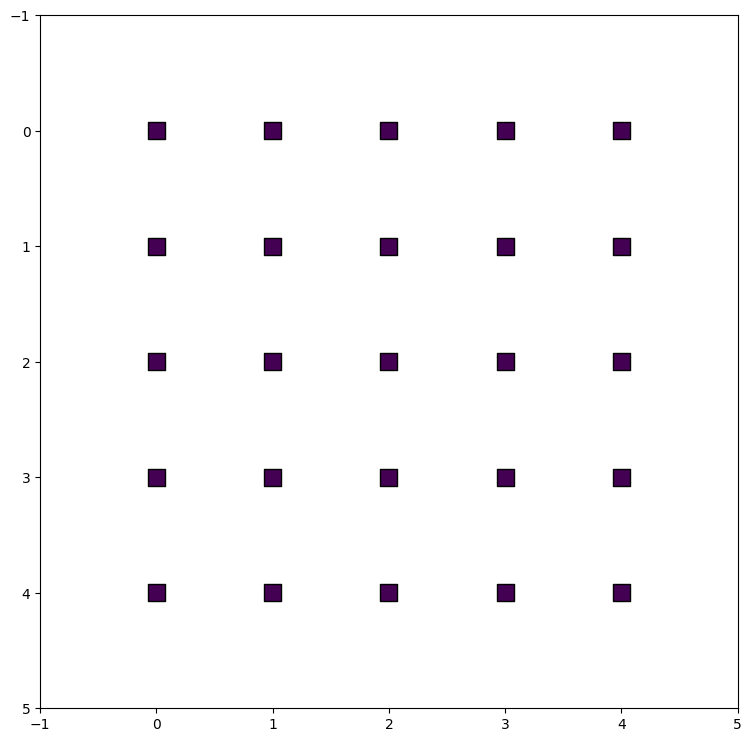